# Simple Linear Regression Notebook

In this notebook you will have all the code we will see during this session. Please, use the notebook during the session to understand how to use the code.

## 1. Create the Dataset


In [11]:
import pandas as pd
data = pd.DataFrame({"drugperc":[1,2,3,4,5], # VALUES OF THE INDEPENDENT VARIABLE (X). INDEPENDENT VARIABLE COLUMN
                     "reactime":[1,1,2,2,4]}) # VALUES OF THE DEPENDENT VARIABLE (Y). DEPENDENT VARIABLE COLUMN

data

,drugperc,reactime
0,1,1
1,2,1
2,3,2
3,4,2
4,5,4


## 2. Scatterplot

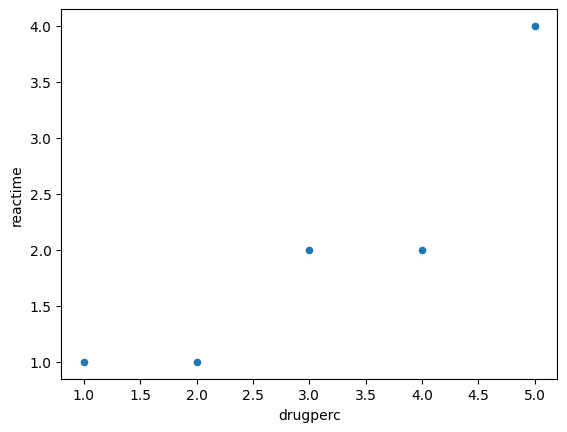

In [3]:
import matplotlib.pyplot as plt
data.plot.scatter(x = "drugperc", y = "reactime")
plt.show()

## 3. The Least Squares Method

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Select the predictors and the target
target = data["reactime"]
predictors = data.drop("reactime", axis=1)

# Linear Regression Object
reg = LinearRegression()

# Model Estimation
reg.fit(predictors, target)

# Show coefficients of the model
coefficients = reg.coef_
intercept = reg.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [0.7]
Intercept: -0.09999999999999964


Statsmodel library offers most of the statistics we will need to interpret in this sessions. That's why we will also use this library to extract statistical information about our models.

In [6]:
import statsmodels.api as sm
import numpy as np

# Select the predictors and the target
target = data["reactime"]
predictors = data.drop("reactime", axis=1)

# Add a column of ones to X for the intercept
predictors = sm.add_constant(predictors)

# Fit the model using statsmodels
model = sm.OLS(target, predictors).fit()

# Get a summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               reactime   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     13.36
Date:                Sun, 12 Mar 2023   Prob (F-statistic):             0.0354
Time:                        08:21:10   Log-Likelihood:                -3.3094
No. Observations:                   5   AIC:                             10.62
Df Residuals:                       3   BIC:                             9.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1000      0.635     -0.157      0.8

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## 4. Measures of the Error

In [21]:
# We need to calculate or extract this information from the model object
sse = model.ssr
rse = np.sqrt(model.mse_resid) # it is also = np.sqrt(sse/n-2), being n = 3 in this case
mean_error = (rse/data["reactime"].mean())*100

print("SSE:",round(model.ssr, 3))
print("RSE:",round(np.sqrt(model.mse_resid), 3))
print("Mean Error:",round(mean_error, 3))

SSE: 1.1
RSE: 0.606
Mean Error: 30.277


## 5. Inferences about the Slope

In [27]:
# We already have the p value information in the summary object
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               reactime   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     13.36
Date:                Sun, 12 Mar 2023   Prob (F-statistic):             0.0354
Time:                        08:56:45   Log-Likelihood:                -3.3094
No. Observations:                   5   AIC:                             10.62
Df Residuals:                       3   BIC:                             9.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1000      0.635     -0.157      0.8

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [26]:
# But we can also extract this information from the model object 
# and calculate the Upper and Lower tailed p-values as follows
p_slope = model.pvalues[1]
p_slope_u = p_slope/2
p_slope_l = 1-p_slope_u

print("p-value two tailed test:", round(p_slope,3))
print("p-value upper tailed test:", round(p_slope_u,3))
print("p-value lower tailed test:", round(p_slope_l,3))

p-value two tailed test: 0.035
p-value upper tailed test: 0.018
p-value lower tailed test: 0.982


## 6. Correlation and Determination Coefficients

In [32]:
# Using the formulas from previous calculations we know that
# the SSyy = 6 and the SSE = 1.1
SSE = 1.1 # previously stated as sse
SSyy = np.sum((data["reactime"]-data["reactime"].mean())**2)
rsquared = 1 - SSE/SSyy
r = np.sqrt(rsquared)
print("R-squared:", round(rsquared,3))
print("Correlation:", round(r,3))

R-squared: 0.817
Correlation: 0.904


In [33]:
# The summary only provides the R-squared
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               reactime   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     13.36
Date:                Sun, 12 Mar 2023   Prob (F-statistic):             0.0354
Time:                        09:09:52   Log-Likelihood:                -3.3094
No. Observations:                   5   AIC:                             10.62
Df Residuals:                       3   BIC:                             9.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1000      0.635     -0.157      0.8

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [36]:
# But we can also extract it from the model object to calculate r
r = np.sqrt(model.rsquared)
print("Correlation:", round(r,3))

Correlation: 0.904


## 7. AIC and BIC Statistics

In [38]:
# We have these two in the model attributes
AIC = model.aic
BIC = model.bic

print("AIC:", round(AIC,3))
print("BIC:", round(BIC,3))

AIC: 10.619
BIC: 9.838


## 8. Estimation and Prediction

In [40]:
target_pred = model.predict(predictors)
data["reactime_pred"] = target_pred
print(data)

   drugperc  reactime  reactime_pred
0         1         1            0.6
1         2         1            1.3
2         3         2            2.0
3         4         2            2.7
4         5         4            3.4


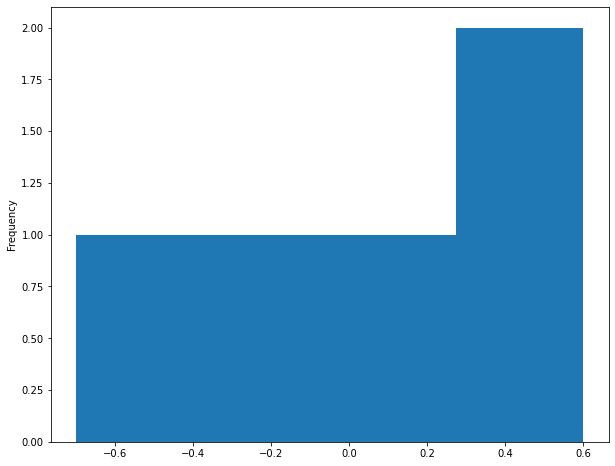

In [45]:
data["residuals"] = model.resid
data["residuals"].plot.hist(bins = 4,figsize=(10,8))
plt.show()

In [62]:
np.std(model.resid)

0.4690415759823429

In [57]:
# Create the new_data object with new info about the IV.
new_data = np.array([4,6])
new_data = sm.add_constant(new_data)

# Get prediction results with 95% confidence interval for mean predictions
pred_results = model.get_prediction(new_data).summary_frame(alpha=0.05)

# Print the predicted values and confidence intervals
print('Predicted values:\n', pred_results['mean'])
print('95% confidence intervals:\n', pred_results[['mean_ci_lower', 'mean_ci_upper']])

Predicted values:
 0    2.7
1    4.1
Name: mean, dtype: float64
95% confidence intervals:
    mean_ci_lower  mean_ci_upper
0       1.644502       3.755498
1       2.078875       6.121125


In [60]:
# Print the prediction interval
print('95% prediction interval:\n', pred_results[['obs_ci_lower', 'obs_ci_upper']].iloc[0])

95% prediction interval:
 obs_ci_lower    0.502806
obs_ci_upper    4.897194
Name: 0, dtype: float64
